# Salary Predictions Based on Job Descriptions

The goal of this project is to predict the salaries based on the job descriptions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import scipy.stats as st
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## LOAD THE DATA

In [2]:
features_data = pd.read_csv('train_features.csv')
salaries_data = pd.read_csv('train_salaries.csv')
test_data = pd.read_csv('test_features.csv')

In [3]:
features_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
salaries_data.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [6]:
data = [features_data, salaries_data, test_data]
for i in range(len(data)):
    print(data[i].info(), end="\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType           

In [7]:
for i in range(len(data)):
    print('The shape of the dataset is ',data[i].shape, end="\n\n")

The shape of the dataset is  (1000000, 8)

The shape of the dataset is  (1000000, 2)

The shape of the dataset is  (1000000, 8)



#  CLEAN THE DATA

In [8]:
features_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [9]:
salaries_data.isnull().sum()

jobId     0
salary    0
dtype: int64

In [10]:
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

The above lines of code conclude that there are no null vlaues in the three datasets.

In [11]:
# train_features.duplicated(keep='first').sum()

In [12]:
for i in range(len(data)):
    print(data[i].duplicated().sum(), end="\n\n")

0

0

0



The above line concludes that there are no duplicates in the three datasets.

In [13]:
'''Now that we know that there are no duplicate values and null values, \
we can merge the train_features and train_salaries dataset. '''

train_data = features_data.merge(salaries_data, on='jobId')

In [14]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [16]:
del [features_data, salaries_data] 

This deletes the two dataframes from the memory

### Exploratory Data Analysis

In [17]:
train_data.describe() 
# This includes only the numerical columns by default which are Years of experiecne, number of miles, and salary.

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [18]:
''' The number of unique values in the dataset'''
train_data.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [19]:
# We also need to know the descriptive statistics of other data types (non-numerical)
train_data.describe(exclude=[np.number])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685191428,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


The above summarizes that there are 1000000 unique jobIds, 63 unique companyId's, 8 different Job types, 5 different degree holders, 9 different majors, and 7 unique industries

In [20]:
train_data[train_data['salary'] == 0 ]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


We see that there are 0 values in salary which do not make sense for a person having a doctoral degree or a masters degree. Hence, we can drop these values assuming that they are incorrect values.

In [21]:
train_data = train_data[train_data['salary'] != 0]

## Data Visualization

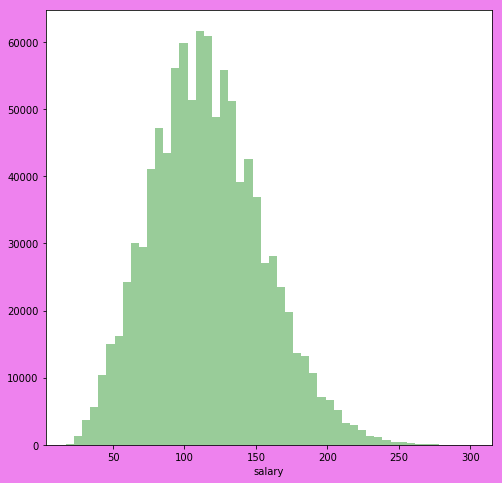

In [22]:
plt.figure(figsize=(8,8), facecolor = 'violet')
sns.distplot(train_data['salary'], kde = False, color = 'green')

It can be understood that most of the salaries average around 110-120K $.


[Text(0,0.5,'SALARY'), Text(0.5,0,'MILESFROMMETROPOLIS')]

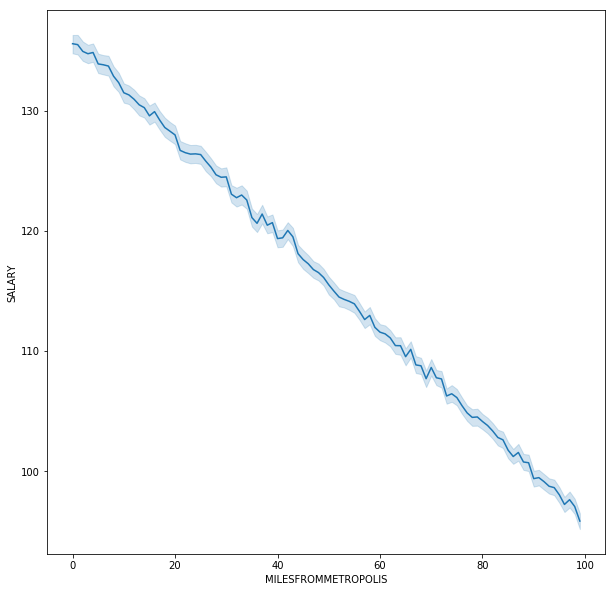

In [23]:
plt.figure(figsize=(10,10))
sns.lineplot('milesFromMetropolis', 'salary', data = train_data).set(xlabel= 'MILESFROMMETROPOLIS', ylabel='SALARY')

The above plot shows that as the number of miles increases from the metropolis, the salaries decrease. So, if a person stays close to the metropolis, the salary is higher.

[Text(0,0.5,'SALARY'), Text(0.5,0,'YEARSEXPERIENCE')]

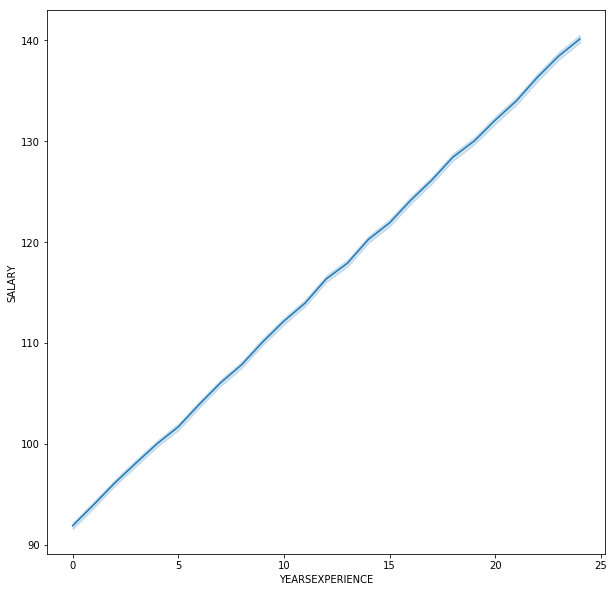

In [24]:
plt.figure(figsize=(10,10))
sns.lineplot('yearsExperience', 'salary', data = train_data).set(xlabel= 'YEARSEXPERIENCE', ylabel='SALARY')

It is evident from the above plot that, as the number of years of experience increases, the salary also increases.

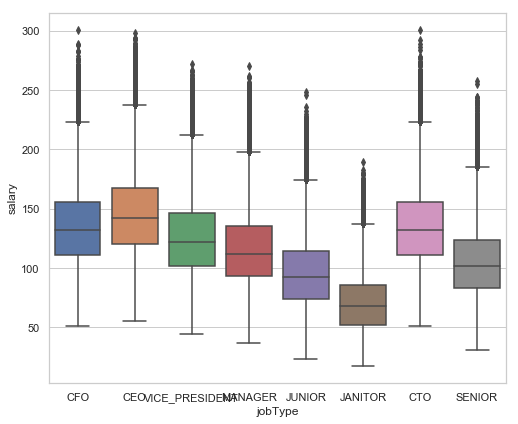

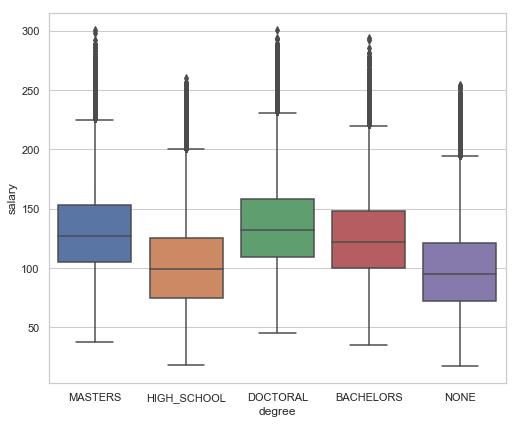

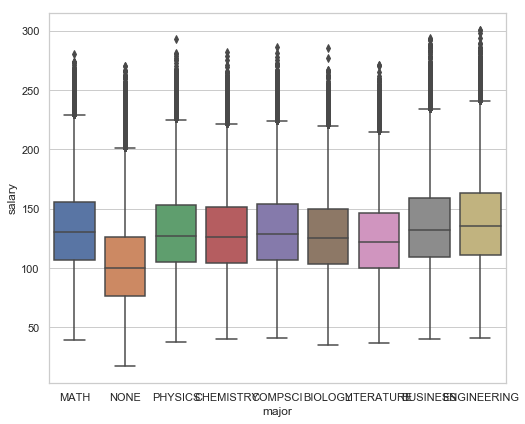

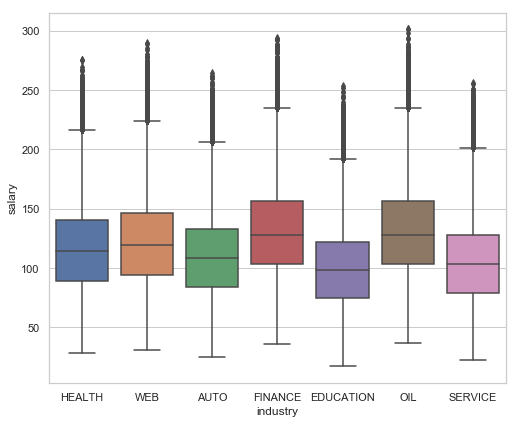

In [25]:
cat_values = ['jobType', 'degree', 'major', 'industry']
for i in range(len(cat_values)):
    plt.figure(figsize=(18,15))
    sns.set(style="whitegrid")
    plt.subplot(2,2,i+1)
    sns.boxplot(x = cat_values[i] , y ='salary', data= train_data)
    

Comparing JobType v/s Salary, higher the role, hgiher is the salary. 
Comparing degree v/s Salary, higher the qualification, higher is the salary.
Comparing Major v/s Salary, the plot does not show any major correaltion between a specific major and salary.
Comparing Industry v/s Salary, we can see that Oil and Finance industry have the highest salaries.

The below plots will show the distribution of salary based on the different features with respect to degree

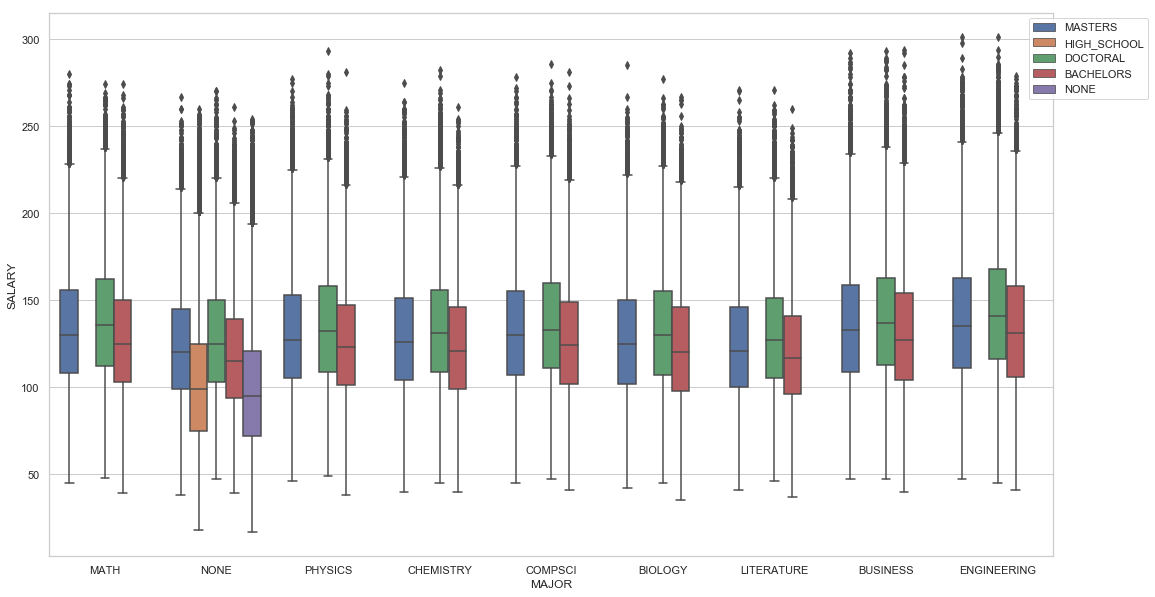

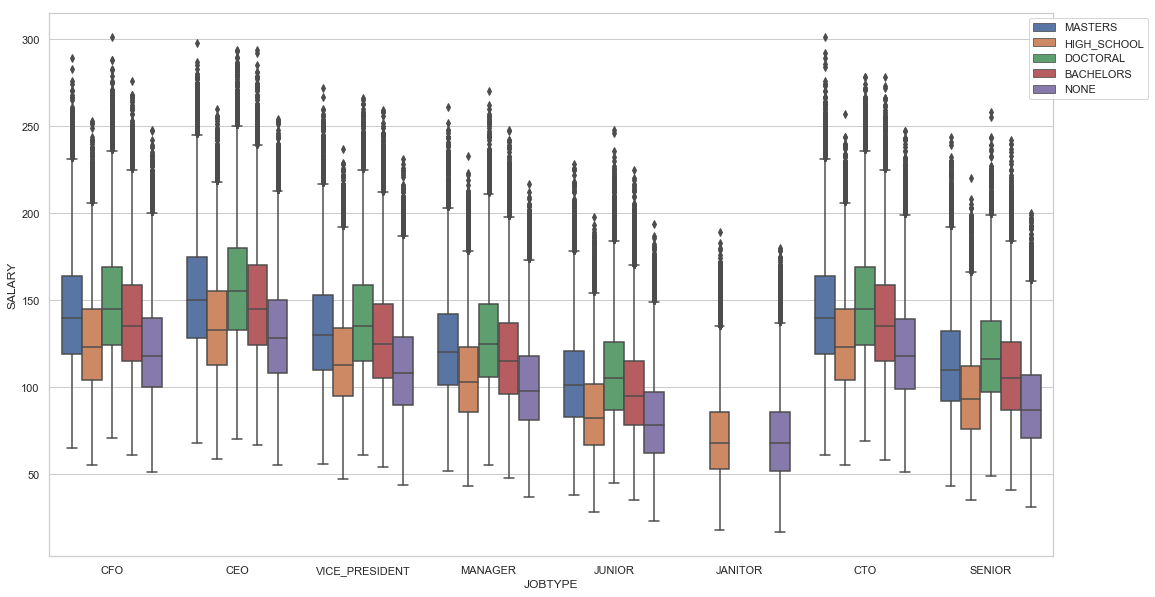

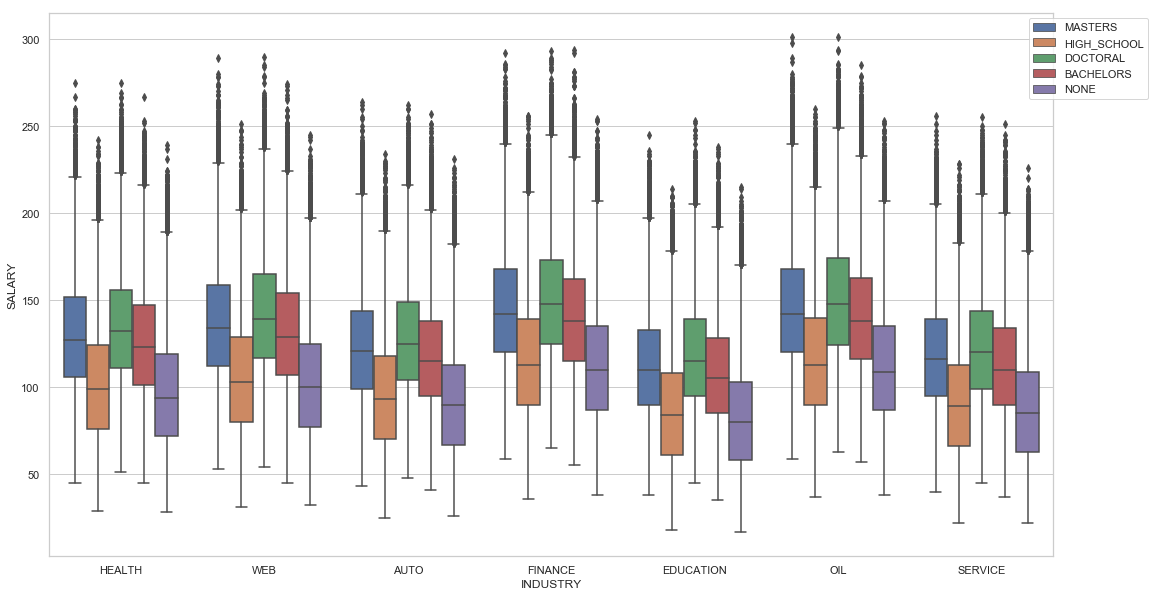

In [26]:
features = ['major', 'jobType', 'industry']
for i in range(len(features)):
    plt.figure(figsize=(18,10))
    sns.boxplot( x = features[i], y ='salary', hue= 'degree', data = train_data)\
    .set(xlabel= features[i].upper(), ylabel='SALARY')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
    plt.show()

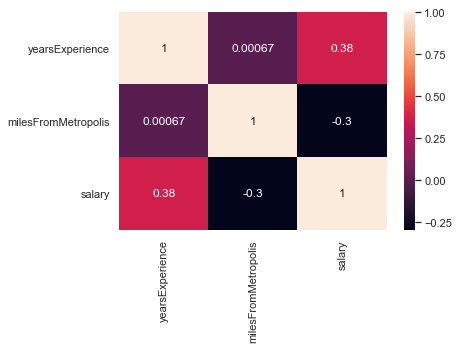

In [27]:
sns.heatmap(train_data.corr(), annot = True)

YearsExperience has a positive correlation with Salary where as milesFromMetropolis has a negative correlation (Both of these correlations are clearly explained in the plots)

In [28]:
#Categorical variables
cat_values

['jobType', 'degree', 'major', 'industry']

# DATA MODELING

In [29]:
#Since there are cateogorical features, we obtain the dummy variables to make better predictions
def one_hot_encode(df, categorical_vars, numerical_vars):
    dummy_df = pd.get_dummies(df[categorical_vars])
    numerical_df = df[numerical_vars].apply(pd.to_numeric)
    return pd.concat([dummy_df, numerical_df], axis = 1)

#This function trains the models which we build
def train_model(model, feature_data, target_data, mean_mse, cv_std, cv):
    neg_mse = cross_val_score(model, feature_data, target_data, cv=cv, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
    
#This returns the summary of the model such as the parameters used    
def print_summary(model, mean_mse, cv_std):
    print('\nModel:', model)
    print('Average MSE:', mean_mse[model])
    print('Standard deviation during CV:', cv_std[model])

In [30]:
categorical_vars = cat_values + ['companyId']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'

In [31]:
feature_data = one_hot_encode(train_data, categorical_vars = categorical_vars, numerical_vars= numeric_vars)
test_data = one_hot_encode(test_data, categorical_vars = categorical_vars, numerical_vars= numeric_vars )

In [32]:
target_data = train_data['salary'] 

In [33]:
#Inititalize the variables
models = []
mean_mse = {}
cv_std = {}

In [34]:
#define the models
lr = LinearRegression()
lr_pipe = make_pipeline(StandardScaler(), PCA(), LinearRegression())
rf = RandomForestRegressor(n_estimators=150, max_depth=25, min_samples_split=60, \
                           max_features=30, verbose=0)
gb = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=0)
                      
models.extend([lr, lr_pipe, rf, gb])

In [35]:
#Obtain the crossval scores to decide the best model using MSE as the metric
for model in models:
    start_time = time.time()
    train_model(model,feature_data,target_data, mean_mse, cv_std, cv = 2)
    print_summary(model, mean_mse, cv_std)
    print('total time for execution: ', round(time.time() - start_time ,3), 'seconds')


Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE: 384.4941458410367
Standard deviation during CV: 1.3985676024973657
total time for execution:  13.126 seconds

Model: Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Average MSE: 384.5256813992363
Standard deviation during CV: 1.4261771541278847
total time for execution:  39.238 seconds

Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=30, max_leaf_node

In [36]:
model = min(mean_mse, key = mean_mse.get) #This obtains the model with the least MSE
start = time.time()
model.fit(feature_data, target_data) #Fitting the model
print('total time for fitting the data : ', round(time.time() - start ,3), 'seconds')
predicted_values = model.predict(test_data)  #making Predictions

total time for fitting the data :  1714.428 seconds


In [37]:
# Saving the predictions to a text file.
np.savetxt('predicted_values.csv', predicted_values,delimiter=',')

In [38]:
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    #linear models don't have feature_importances_
    importances = [0]*len(feature_data.columns)
    
feature_importances = pd.DataFrame({'Features': feature_data.columns, 'Importance':importances})
feature_importances.sort_values(by='Importance', ascending = False, inplace = True)
feature_importances.set_index('Features', inplace=True, drop=True)

In [39]:
feature_importances.head()

,Importance
Features,
jobType_JANITOR,0.218285
yearsExperience,0.186719
milesFromMetropolis,0.129772
major_NONE,0.085625
jobType_JUNIOR,0.074764


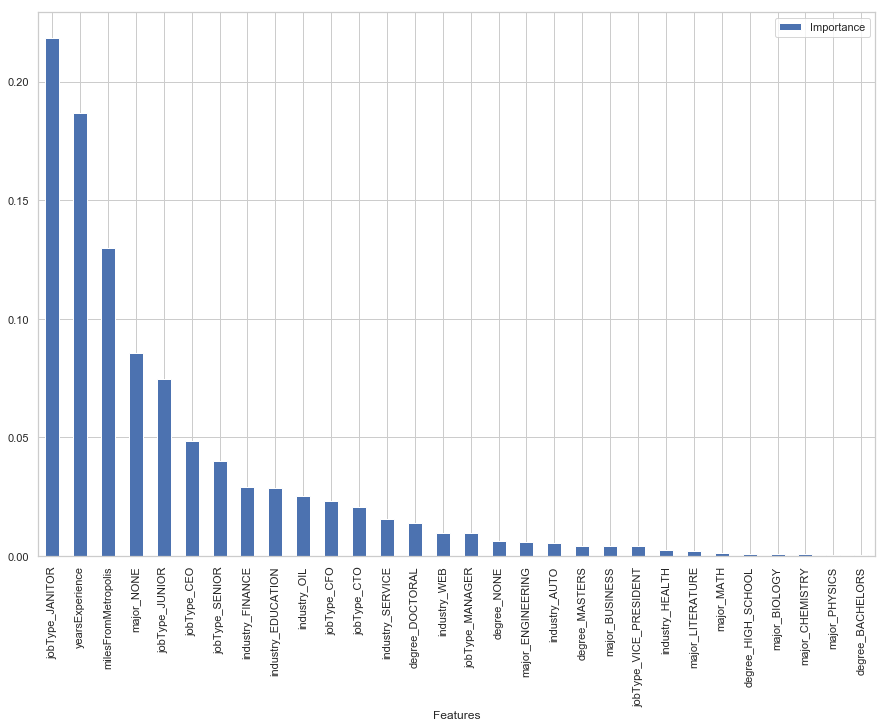

In [41]:
feature_importances[:30].plot.bar(figsize=(15,10))

In [42]:
'''The above plot shows the feature importances'''

'The above plot shows the feature importances'